### Objetivo
Classificação das notícias do dataset 20newsgroups em seus respectivos temas.

#### Imports

In [16]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from auxiliar_functions.read_data import read_data
from auxiliar_functions.preprocessing import preprocessing, convert_to_matrix_tfidf
from auxiliar_functions.classification import create_classifier

#### Read data

In [20]:
raw_data = read_data()
y = raw_data.target

#### Preprocessing

In [21]:
data, data_for_tfidf = preprocessing(raw_data)
print(data[0])

[nltk_data] Downloading package punkt to /home/mayara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mayara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mayara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Split data

In [6]:
# Without dimensionality reduction
(X_train, X_test, y_train, y_test) = train_test_split(data_for_tfidf, y, test_size=0.4, random_state=0)

#### Convert data to matrix TF-IDF

In [7]:
tf_train, tf_test, tfidf = convert_to_matrix_tfidf(data_for_tfidf, X_train, X_test)

(4031, 5889)


### Classifications

##### Support Vector Machine

Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       191
           1       0.73      0.86      0.79       209
           2       0.92      0.86      0.89       236
           3       0.96      0.82      0.89       254
           4       0.88      0.82      0.85       224
           5       0.70      0.81      0.75       237
           6       0.89      0.82      0.85       262

    accuracy                           0.84      1613
   macro avg       0.84      0.84      0.84      1613
weighted avg       0.85      0.84      0.84      1613

Confusion matrix: 


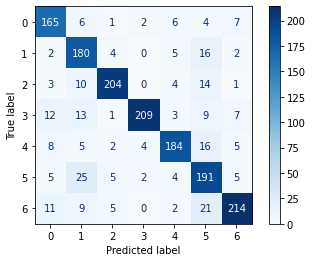

array([3, 5, 1, ..., 3, 6, 5])

In [8]:
svm_clf = SVC(C=2, gamma=0.5, kernel='rbf')

create_classifier(svm_clf, tf_train, y_train, tf_test, y_test)

##### Naive Bayes

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       191
           1       0.79      0.85      0.82       209
           2       0.90      0.92      0.91       236
           3       0.95      0.89      0.92       254
           4       0.72      0.89      0.80       224
           5       0.84      0.73      0.78       237
           6       0.92      0.85      0.88       262

    accuracy                           0.85      1613
   macro avg       0.86      0.86      0.85      1613
weighted avg       0.86      0.85      0.86      1613

Confusion matrix: 


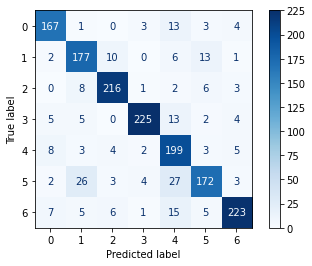

array([3, 3, 1, ..., 3, 6, 3])

In [11]:
nb_clf = MultinomialNB(alpha=0.01)

create_classifier(nb_clf, tf_train, y_train, tf_test, y_test)

##### Decision Tree

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       191
           1       0.87      0.29      0.43       209
           2       0.83      0.30      0.44       236
           3       0.89      0.56      0.69       254
           4       0.99      0.32      0.48       224
           5       1.00      0.00      0.00       237
           6       0.21      0.98      0.35       262

    accuracy                           0.37      1613
   macro avg       0.83      0.35      0.34      1613
weighted avg       0.81      0.37      0.35      1613

Confusion matrix: 


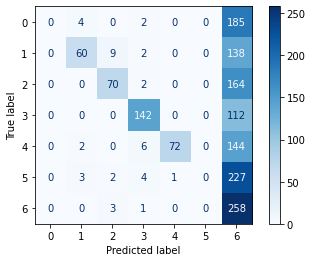

array([3, 6, 6, ..., 6, 6, 6])

In [13]:
dt_clf = DecisionTreeClassifier(min_impurity_decrease=0.02, class_weight='balanced') 

create_classifier(dt_clf, tf_train, y_train, tf_test, y_test)

##### Artificial Neural Networks: Multilayer Perceptron

Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       191
           1       0.73      0.86      0.79       209
           2       0.92      0.89      0.90       236
           3       0.94      0.87      0.91       254
           4       0.83      0.83      0.83       224
           5       0.75      0.81      0.78       237
           6       0.89      0.83      0.86       262

    accuracy                           0.85      1613
   macro avg       0.85      0.85      0.85      1613
weighted avg       0.85      0.85      0.85      1613

Confusion matrix: 


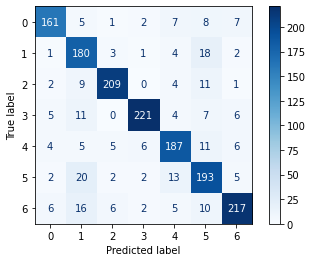

array([3, 3, 1, ..., 0, 6, 5])

In [17]:
mlp_clf = MLPClassifier(hidden_layer_sizes=10, max_iter=3000)

create_classifier(mlp_clf, tf_train, y_train, tf_test, y_test)

##### k-Nearest Neighbor

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.10      0.18       191
           1       0.14      1.00      0.24       209
           2       1.00      0.04      0.08       236
           3       0.91      0.04      0.08       254
           4       1.00      0.02      0.04       224
           5       1.00      0.03      0.07       237
           6       1.00      0.16      0.27       262

    accuracy                           0.19      1613
   macro avg       0.86      0.20      0.14      1613
weighted avg       0.87      0.19      0.14      1613

Confusion matrix: 


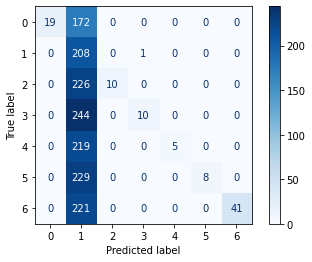

array([1, 1, 1, ..., 1, 6, 1])

In [18]:
knn_clf = KNeighborsClassifier(n_neighbors=3) 

create_classifier(knn_clf, tf_train, y_train, tf_test, y_test)

##### Random Forest

Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       191
           1       0.60      0.77      0.68       209
           2       0.79      0.81      0.80       236
           3       0.89      0.80      0.85       254
           4       0.85      0.76      0.80       224
           5       0.61      0.65      0.63       237
           6       0.85      0.72      0.78       262

    accuracy                           0.76      1613
   macro avg       0.76      0.76      0.76      1613
weighted avg       0.77      0.76      0.76      1613

Confusion matrix: 


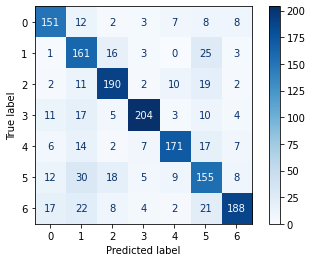

array([3, 3, 1, ..., 1, 6, 5])

In [19]:
rf_clf = RandomForestClassifier(n_jobs=-1, max_features='sqrt', n_estimators=50)

create_classifier(rf_clf, tf_train, y_train, tf_test, y_test)